In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score , r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
datasets = load_wine()

In [2]:
df = pd.DataFrame(datasets.data , columns=datasets.feature_names)

In [3]:
X = df
y = datasets.target

In [8]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scaled)

In [12]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

In [13]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [14]:
cumulative_explained_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293])

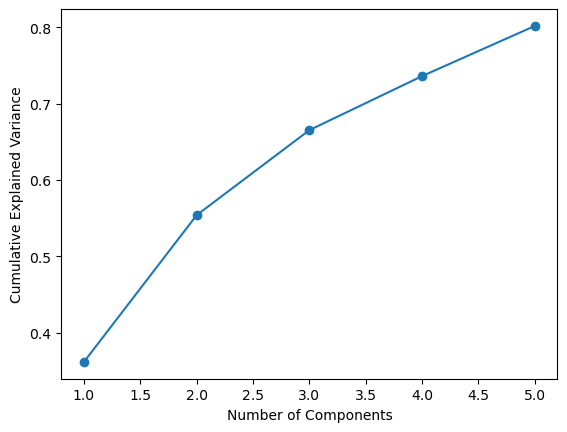

In [15]:
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

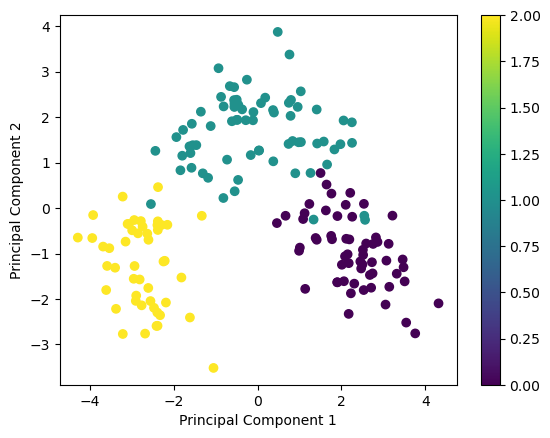

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

cluster = kmeans.fit_predict(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
